# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, how="inner", on="Mouse ID")
merged_data
# Display the data table for preview
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [102]:
# Checking the number of mice.
mice =merged_data["Mouse ID"].unique()

count= 0 
for m in mice:
    count += 1
else:
    print(count)

249


In [103]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mice_duplicates 
mice_duplicates = merged_data[merged_data.duplicated(["Mouse ID","Timepoint"])]
mice_duplicates = pd.DataFrame({"Mouse Duplicate ID": mice_duplicates["Mouse ID"].unique()})
mice_duplicates


,Mouse Duplicate ID
0,g989


In [104]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseDup_AllData = merged_data.loc[merged_data["Mouse ID"] == str(mice_duplicates.iloc[0,0]), :]
mouseDup_AllData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = merged_data[merged_data["Mouse ID"] == str(mice_duplicates.iloc[0,0])].index
clean_MergedData = merged_data.drop(drop_index)
clean_MergedData.reset_index(inplace=True)
clean_MergedData


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
1875,1888,m601,25,33.118756,1,Capomulin,Male,22,17
1876,1889,m601,30,31.758275,1,Capomulin,Male,22,17
1877,1890,m601,35,30.834357,1,Capomulin,Male,22,17
1878,1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [106]:
# Checking the number of mice in the clean DataFrame.
len(clean_MergedData["Mouse ID"].unique())

248

## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Mean_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
Median_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
Var_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
STD_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
SEM_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()

combine_StatData = pd.merge(Mean_DrugRegimen, Median_DrugRegimen, how = "inner", on ="Drug Regimen")
combine_StatData = pd.merge(combine_StatData, Var_DrugRegimen, how = "inner", on ="Drug Regimen")
combine_StatData_MMV= combine_StatData.rename(columns={
       "Tumor Volume (mm3)_x": "Mean Tumor Volume",
       "Tumor Volume (mm3)_y": "Median Tumor Volume",
       "Tumor Volume (mm3)":   "Variance Tumor Volume" 
        
}
)
combine_StatData_MMV = pd.merge(combine_StatData_MMV, STD_DrugRegimen, how= "inner", on= "Drug Regimen")
combine_StatData_MMVSS = pd.merge(combine_StatData_MMV, SEM_DrugRegimen, how= "inner", on= "Drug Regimen")
combine_StatData_MMVSS_Renamed = combine_StatData_MMVSS.rename(columns={
       "Tumor Volume (mm3)_x": "Standard Deviation Tumor Volume" ,
       "Tumor Volume (mm3)_y" : "SEM Tumor Volume"
}
)
combine_StatData_MMVSS_Renamed





,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

Mean_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
Median_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
Var_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
STD_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
SEM_DrugRegimen = clean_MergedData.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()

combine_StatData = pd.merge(Mean_DrugRegimen, Median_DrugRegimen, how = "inner", on ="Drug Regimen")
combine_StatData = pd.merge(combine_StatData, Var_DrugRegimen, how = "inner", on ="Drug Regimen")
combine_StatData_MMV= combine_StatData.rename(columns={
       "Tumor Volume (mm3)_x": "Mean Tumor Volume",
       "Tumor Volume (mm3)_y": "Median Tumor Volume",
       "Tumor Volume (mm3)":   "Variance Tumor Volume" 
        
}
)
combine_StatData_MMV = pd.merge(combine_StatData_MMV, STD_DrugRegimen, how= "inner", on= "Drug Regimen")
combine_StatData_MMVSS = pd.merge(combine_StatData_MMV, SEM_DrugRegimen, how= "inner", on= "Drug Regimen")
combine_StatData_MMVSS_Renamed = combine_StatData_MMVSS.rename(columns={
       "Tumor Volume (mm3)_x": "Standard Deviation Tumor Volume" ,
       "Tumor Volume (mm3)_y" : "SEM Tumor Volume"
}
)
combine_StatData_MMVSS_Renamed


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

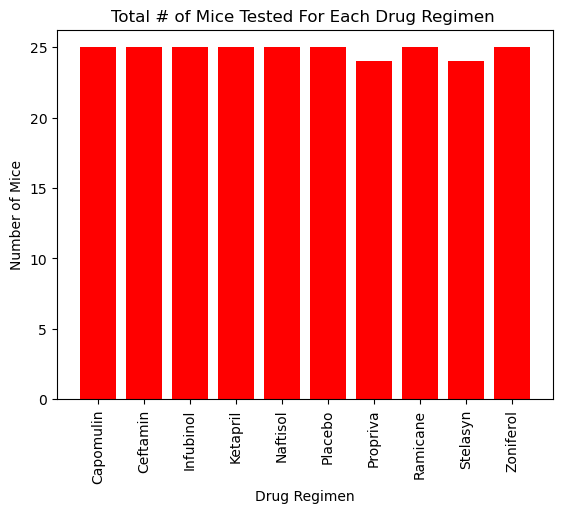

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_timeplots = clean_MergedData.groupby("Drug Regimen")[["Mouse ID"]].nunique()
mice_timeplots = mice_timeplots.iloc[:,0]
x_axis = np.arange(len(mice_timeplots))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_timeplots.index, rotation = "vertical")
plt.bar(x_axis, mice_timeplots, color="red", align = "center")
plt.title("Total # of Mice Tested For Each Drug Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

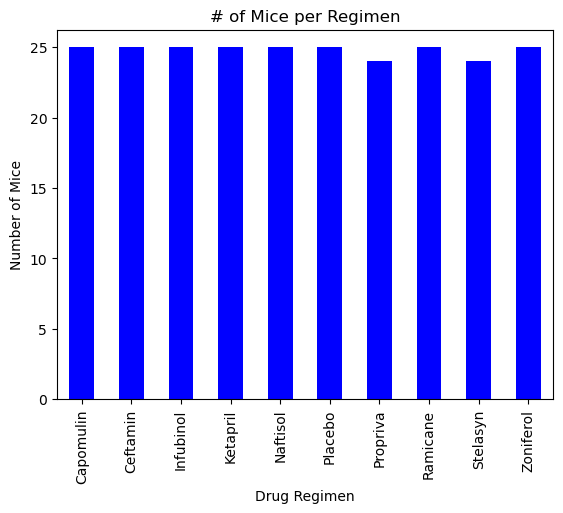

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


mice_count_chart = mice_timeplots.plot(kind="bar", title="# of Mice per Regimen",legend=False,color="blue")
mice_count_chart.set_ylabel("Number of Mice")
plt.show()


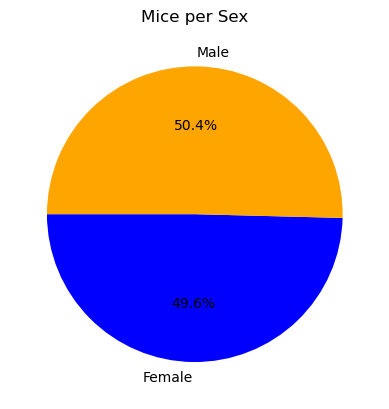

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_MergedData.groupby("Sex")[["Mouse ID"]].nunique()
mice_sex_chart = mice_sex["Mouse ID"].plot(
    kind="pie",label="", title="Mice per Sex", labels=mice_sex.index, autopct='%1.1f%%',legend=False,startangle=180,colors=["blue","orange"])


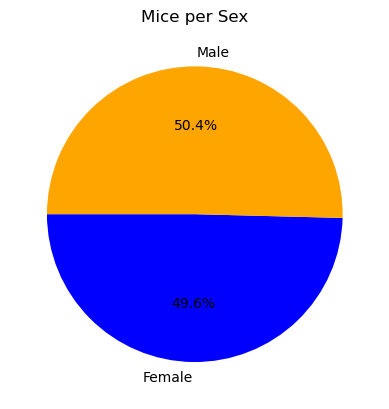

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig1, ax1 = plt.subplots()
ax1.pie(mice_sex["Mouse ID"], labels=mice_sex.index, autopct='%1.1f%%',startangle=180,colors=["blue","orange"])
plt.title("Mice per Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


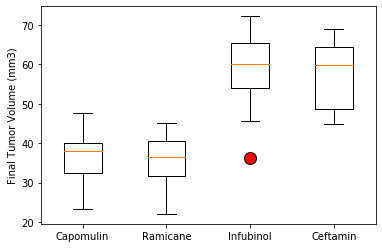

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

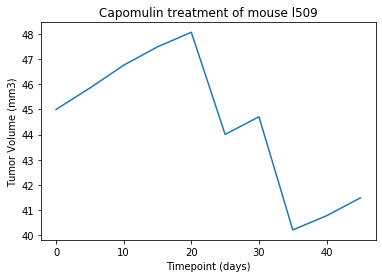

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



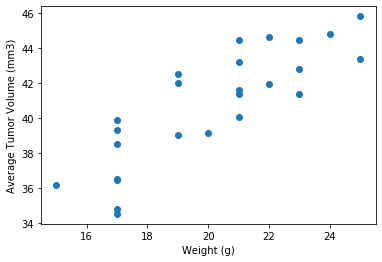

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


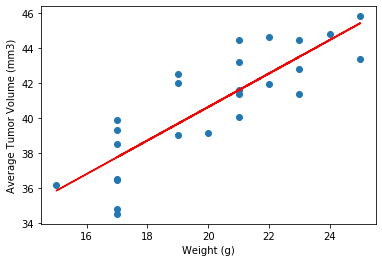

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

